In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import openpyxl

In [2]:
# Data loading
offenses = pd.read_excel('data/Offenses Data Test.xlsx')

In [3]:
# Offenses
print(f'Offenses shape: {offenses.shape}')
print(f'\nOffenses columns: \n{offenses.columns}')
print(f'\nOffenses info: {offenses.info()}')
print(f'\nOffenses describe: \n {offenses.describe()}')

# Categorical data: itype, zone and category
# Date: dateReport: daily data from June 1, 2017 to August 17, 2021
# Boolean: vehicle_related

Offenses shape: (31998, 6)

Offenses columns: 
Index(['data_casenum', 'dateReport (date)', 'itype', 'Zone', 'Category',
       'Vehicle Related?'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31998 entries, 0 to 31997
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data_casenum       31998 non-null  object        
 1   dateReport (date)  31998 non-null  datetime64[ns]
 2   itype              31998 non-null  object        
 3   Zone               31823 non-null  object        
 4   Category           31998 non-null  object        
 5   Vehicle Related?   31998 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.5+ MB

Offenses info: None

Offenses describe: 
                    dateReport (date)
count                          31998
mean   2019-06-25 12:06:04.884680448
min              2017-06-01 09:40:00
25%              2018-06-24 15:0

In [4]:
print(offenses.head())

  data_casenum   dateReport (date) itype Zone Category Vehicle Related?
0     21-38561 2021-08-17 20:46:00   23H   Z3    Other                N
1     21-38559 2021-08-17 20:10:00   23C   Z2    Other                N
2     21-38559 2021-08-17 20:10:00   23C   Z1    Other                N
3     21-38557 2021-08-17 19:27:00   91J   Z5  Larceny                N
4     21-38547 2021-08-17 18:57:00   35A   Z8    Other                N


In [5]:
# Checking for missing data:
offenses.isna().sum()

data_casenum           0
dateReport (date)      0
itype                  0
Zone                 175
Category               0
Vehicle Related?       0
dtype: int64

In [6]:
offenses['Zone'].fillna(value='OtherZ', inplace=True)
print(offenses.isna().sum())

data_casenum         0
dateReport (date)    0
itype                0
Zone                 0
Category             0
Vehicle Related?     0
dtype: int64


In [7]:
# offenses['itype'].value_counts()
print(f'Offense itype categories: {offenses["itype"].nunique()}')
print(f'Offense Zone categories: {offenses["Zone"].nunique()}')
print(f'Offense Category categories: {offenses["Category"].nunique()}')
print(f'Offense vehicle categories: {offenses["Vehicle Related?"].nunique()}')

Offense itype categories: 78
Offense Zone categories: 13
Offense Category categories: 4
Offense vehicle categories: 2


In [8]:
# Adding year and month year columns
offenses['Year'] = offenses['dateReport (date)'].dt.year
offenses['month'] = offenses['dateReport (date)'].dt.month
offenses['day_week'] = offenses['dateReport (date)'].dt.dayofweek
print(offenses['Year'].value_counts(normalize=True))
# offenses['month'].value_counts(normalize=True)
# offenses['day_week'].value_counts(normalize=True)

Year
2019    0.259235
2018    0.244172
2020    0.219670
2017    0.139602
2021    0.137321
Name: proportion, dtype: float64


In [9]:
# Converting data types as categorical
offenses['Year'] = offenses['Year'].astype('category')
offenses['itype'] = offenses['itype'].astype('category')
offenses['Zone'] = offenses['Zone'].astype('category')
offenses['Category'] = offenses['Category'].astype('category')
offenses['Vehicle Related?'] = offenses['Vehicle Related?'].astype('category')

/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

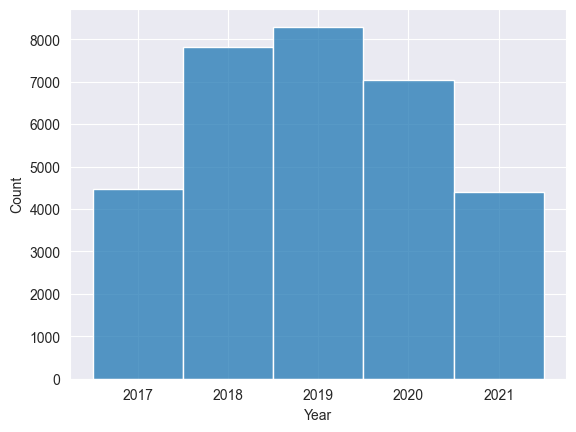

In [10]:
sns.histplot(data = offenses, x = 'Year', stat = "count", bins = 3)

In [11]:
offenses['itype'].value_counts(normalize=True)

itype
23C     0.155385
13B     0.088818
35A     0.085412
90Z     0.055660
290     0.054222
          ...   
09C     0.000031
510     0.000031
9000    0.000031
9001    0.000031
11C     0.000031
Name: proportion, Length: 78, dtype: float64

In [13]:
offenses['Zone'].value_counts(normalize=True, dropna=False)

Zone
Z1        0.191418
Z3        0.178699
Z5        0.149822
Z6        0.135758
Z4        0.131539
Z8        0.086880
Z2        0.072723
Z7        0.047534
OtherZ    0.005469
1         0.000063
4         0.000031
6         0.000031
8         0.000031
Name: proportion, dtype: float64

In [14]:
offenses['Category'].value_counts(normalize=True)

Category
Other       0.716389
Larceny     0.275986
Rape        0.007188
Homicide    0.000438
Name: proportion, dtype: float64

In [15]:
offenses['Vehicle Related?'].value_counts(normalize=True)

Vehicle Related?
N    0.925714
Y    0.074286
Name: proportion, dtype: float64

In [18]:
# Refactoring the dataframe
offenses['newZone'] = offenses['Zone'].apply(lambda x: 'zone_other' if x not in ('Z1', 'Z3', 'Z4', 'Z5', 'Z6') else x)
offenses['newiType'] = offenses['itype'].apply(lambda x: 'itype_other' if x not in ('23C', '13B', '35A', '90Z', '290', '23H', '91V', '23F', '220', '13A') else x)

In [22]:
print(offenses['newiType'].value_counts(normalize=True))
print('\n')
print(offenses['newZone'].value_counts(normalize=True))

newiType
itype_other    0.357366
23C            0.155385
13B            0.088818
35A            0.085412
90Z            0.055660
290            0.054222
23H            0.054191
91V            0.045847
23F            0.040753
220            0.033533
13A            0.028814
Name: proportion, dtype: float64


newZone
zone_other    0.212763
Z1            0.191418
Z3            0.178699
Z5            0.149822
Z6            0.135758
Z4            0.131539
Name: proportion, dtype: float64


In [24]:
print(offenses.shape)
new_off = offenses[offenses['newZone'] != 'zone_other']
print(new_off.shape)
new_off = new_off[new_off['newiType'] != 'itype_other']
print(new_off.shape)
print(new_off['newiType'].value_counts(normalize = True, dropna=True))
print(new_off['newZone'].value_counts(normalize = True, dropna=True))

(31998, 11)
(25190, 11)
(16185, 11)
newiType
23C    0.241149
13B    0.138276
35A    0.135372
90Z    0.085573
290    0.084276
23H    0.084028
91V    0.071239
23F    0.063886
220    0.052209
13A    0.043991
Name: proportion, dtype: float64
newZone
Z1    0.243682
Z3    0.227062
Z5    0.189064
Z6    0.173618
Z4    0.166574
Name: proportion, dtype: float64


/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

<Axes: xlabel='Year', ylabel='count'>

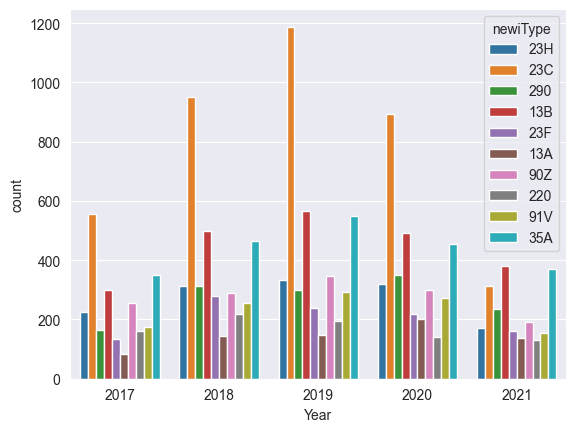

In [28]:
# sns.histplot(data = new_off, x = 'Year', stat = "count", hue = 'newZone')
# sns.countplot(data=new_off, x='Year', hue='newZone')
sns.countplot(data=new_off, x='Year', hue='newiType')

/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

<Axes: xlabel='Year', ylabel='count'>

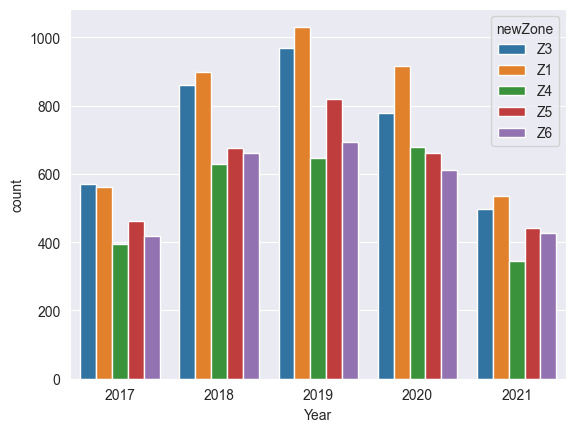

In [29]:
sns.countplot(data=new_off, x='Year', hue='newZone')

/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Year', ylabel='count'>

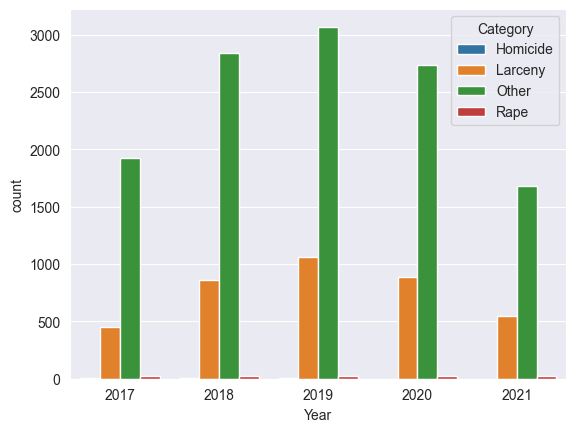

In [30]:
sns.countplot(data=new_off, x='Year', hue='Category')

In [35]:
pd.crosstab(new_off['newZone'], new_off['newiType'])

newiType,13A,13B,220,23C,23F,23H,290,35A,90Z,91V
newZone,,,,,,,,,,
Z1,160,527,214,978,255,316,328,525,355,286
Z3,178,516,169,870,243,319,292,498,318,272
Z4,114,372,142,675,179,224,235,337,231,187
Z5,123,429,174,726,176,267,254,458,251,202
Z6,137,394,146,654,181,234,255,373,230,206


/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/carlos/DataspellProjects/DatawalkEx3/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categoric

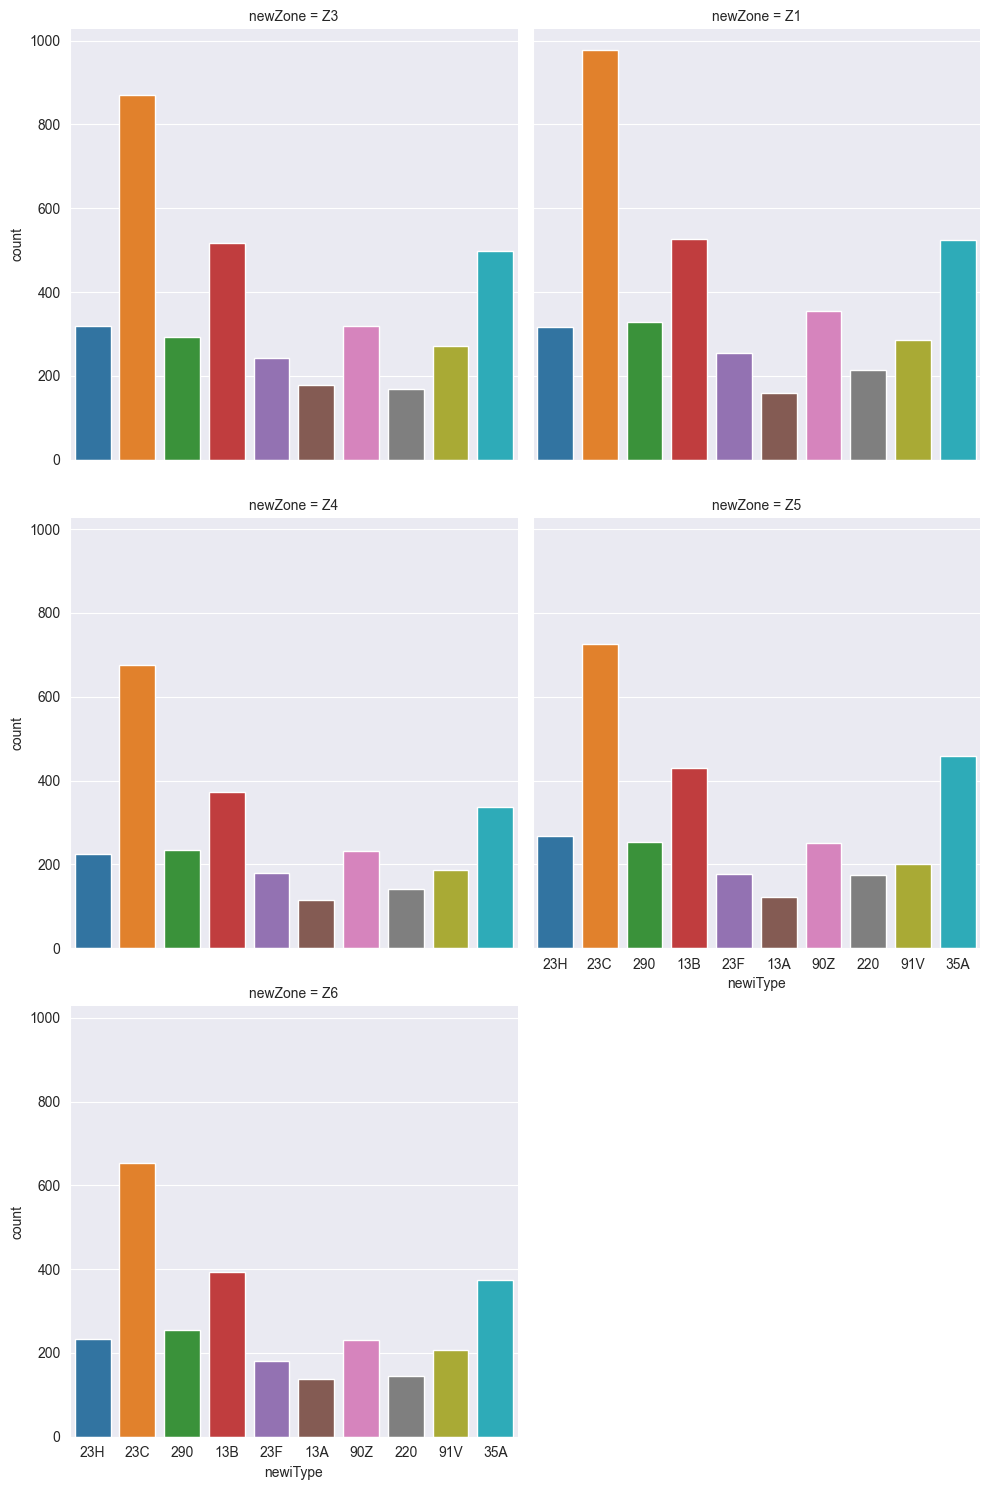

In [34]:
sns.catplot(data=new_off, x='newiType', kind='count', col='newZone', col_wrap=2)